In [1]:
#Import the Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the data into dataframe

df = pd.read_csv("train.csv",index_col=0)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


## Check Data quality
->check for data shape
->check for null data 
->check for data type 

In [3]:
df.shape

(74051, 9)

<Axes: ylabel='id'>

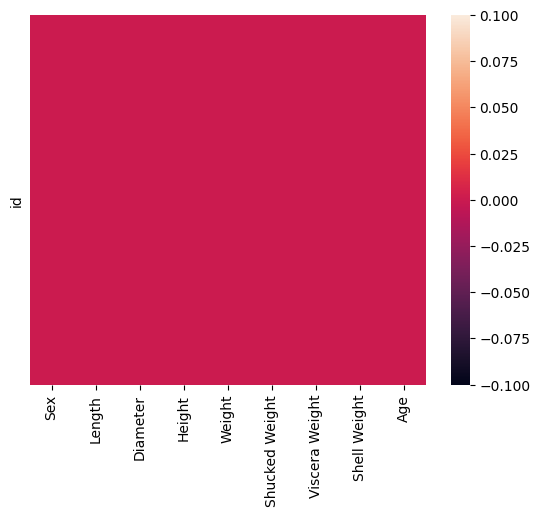

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

There is no Null value in the Data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
df['Sex'] = df['Sex'].astype("category")

In [8]:
df.rename(columns={'Shucked Weight':'Shucked_Weight','Viscera Weight':'Viscera_Weight','Shell Weight':'Shell_Weight'},inplace=True)

## Exploratory data analysis (EDA)

In [9]:
df['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

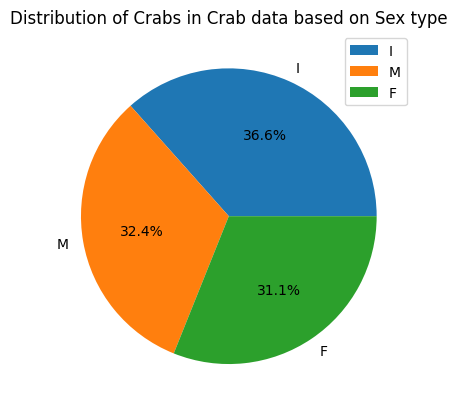

In [10]:
plt.pie(x=df['Sex'].value_counts(),labels=df['Sex'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Crabs in Crab data based on Sex type")
plt.legend()
plt.show()

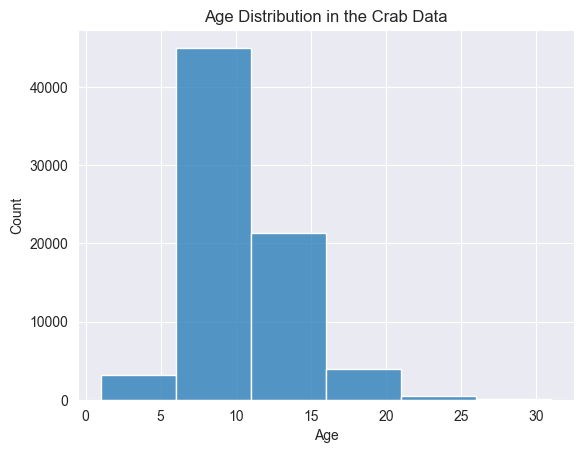

In [11]:
sns.set_style('darkgrid')
sns.histplot(data=df,x='Age',binwidth=5)
plt.title("Age Distribution in the Crab Data")
plt.show()

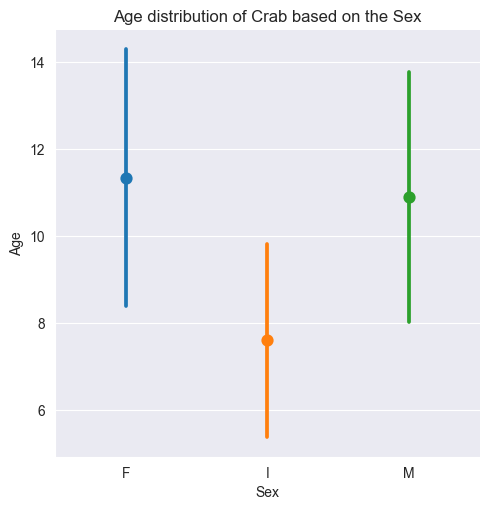

In [12]:
sns.catplot(data=df,x='Sex',y='Age',kind='point',hue='Sex',ci='sd')
plt.title("Age distribution of Crab based on the Sex")
sns.despine()
plt.show()

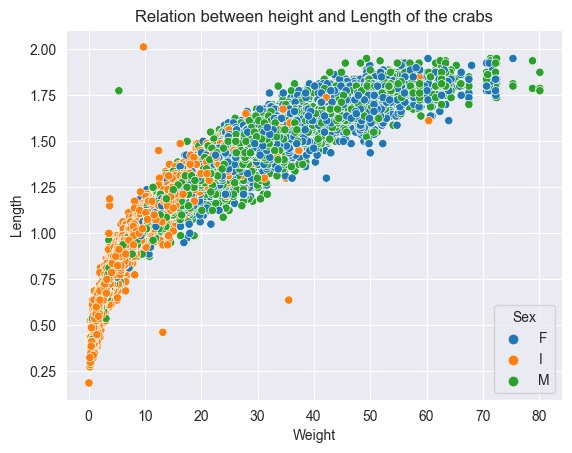

In [13]:
sns.scatterplot(data=df,x='Weight',y='Length',hue='Sex')
plt.title("Relation between height and Length of the crabs")
plt.show()

### Check the relationship between multiple variables in the data set

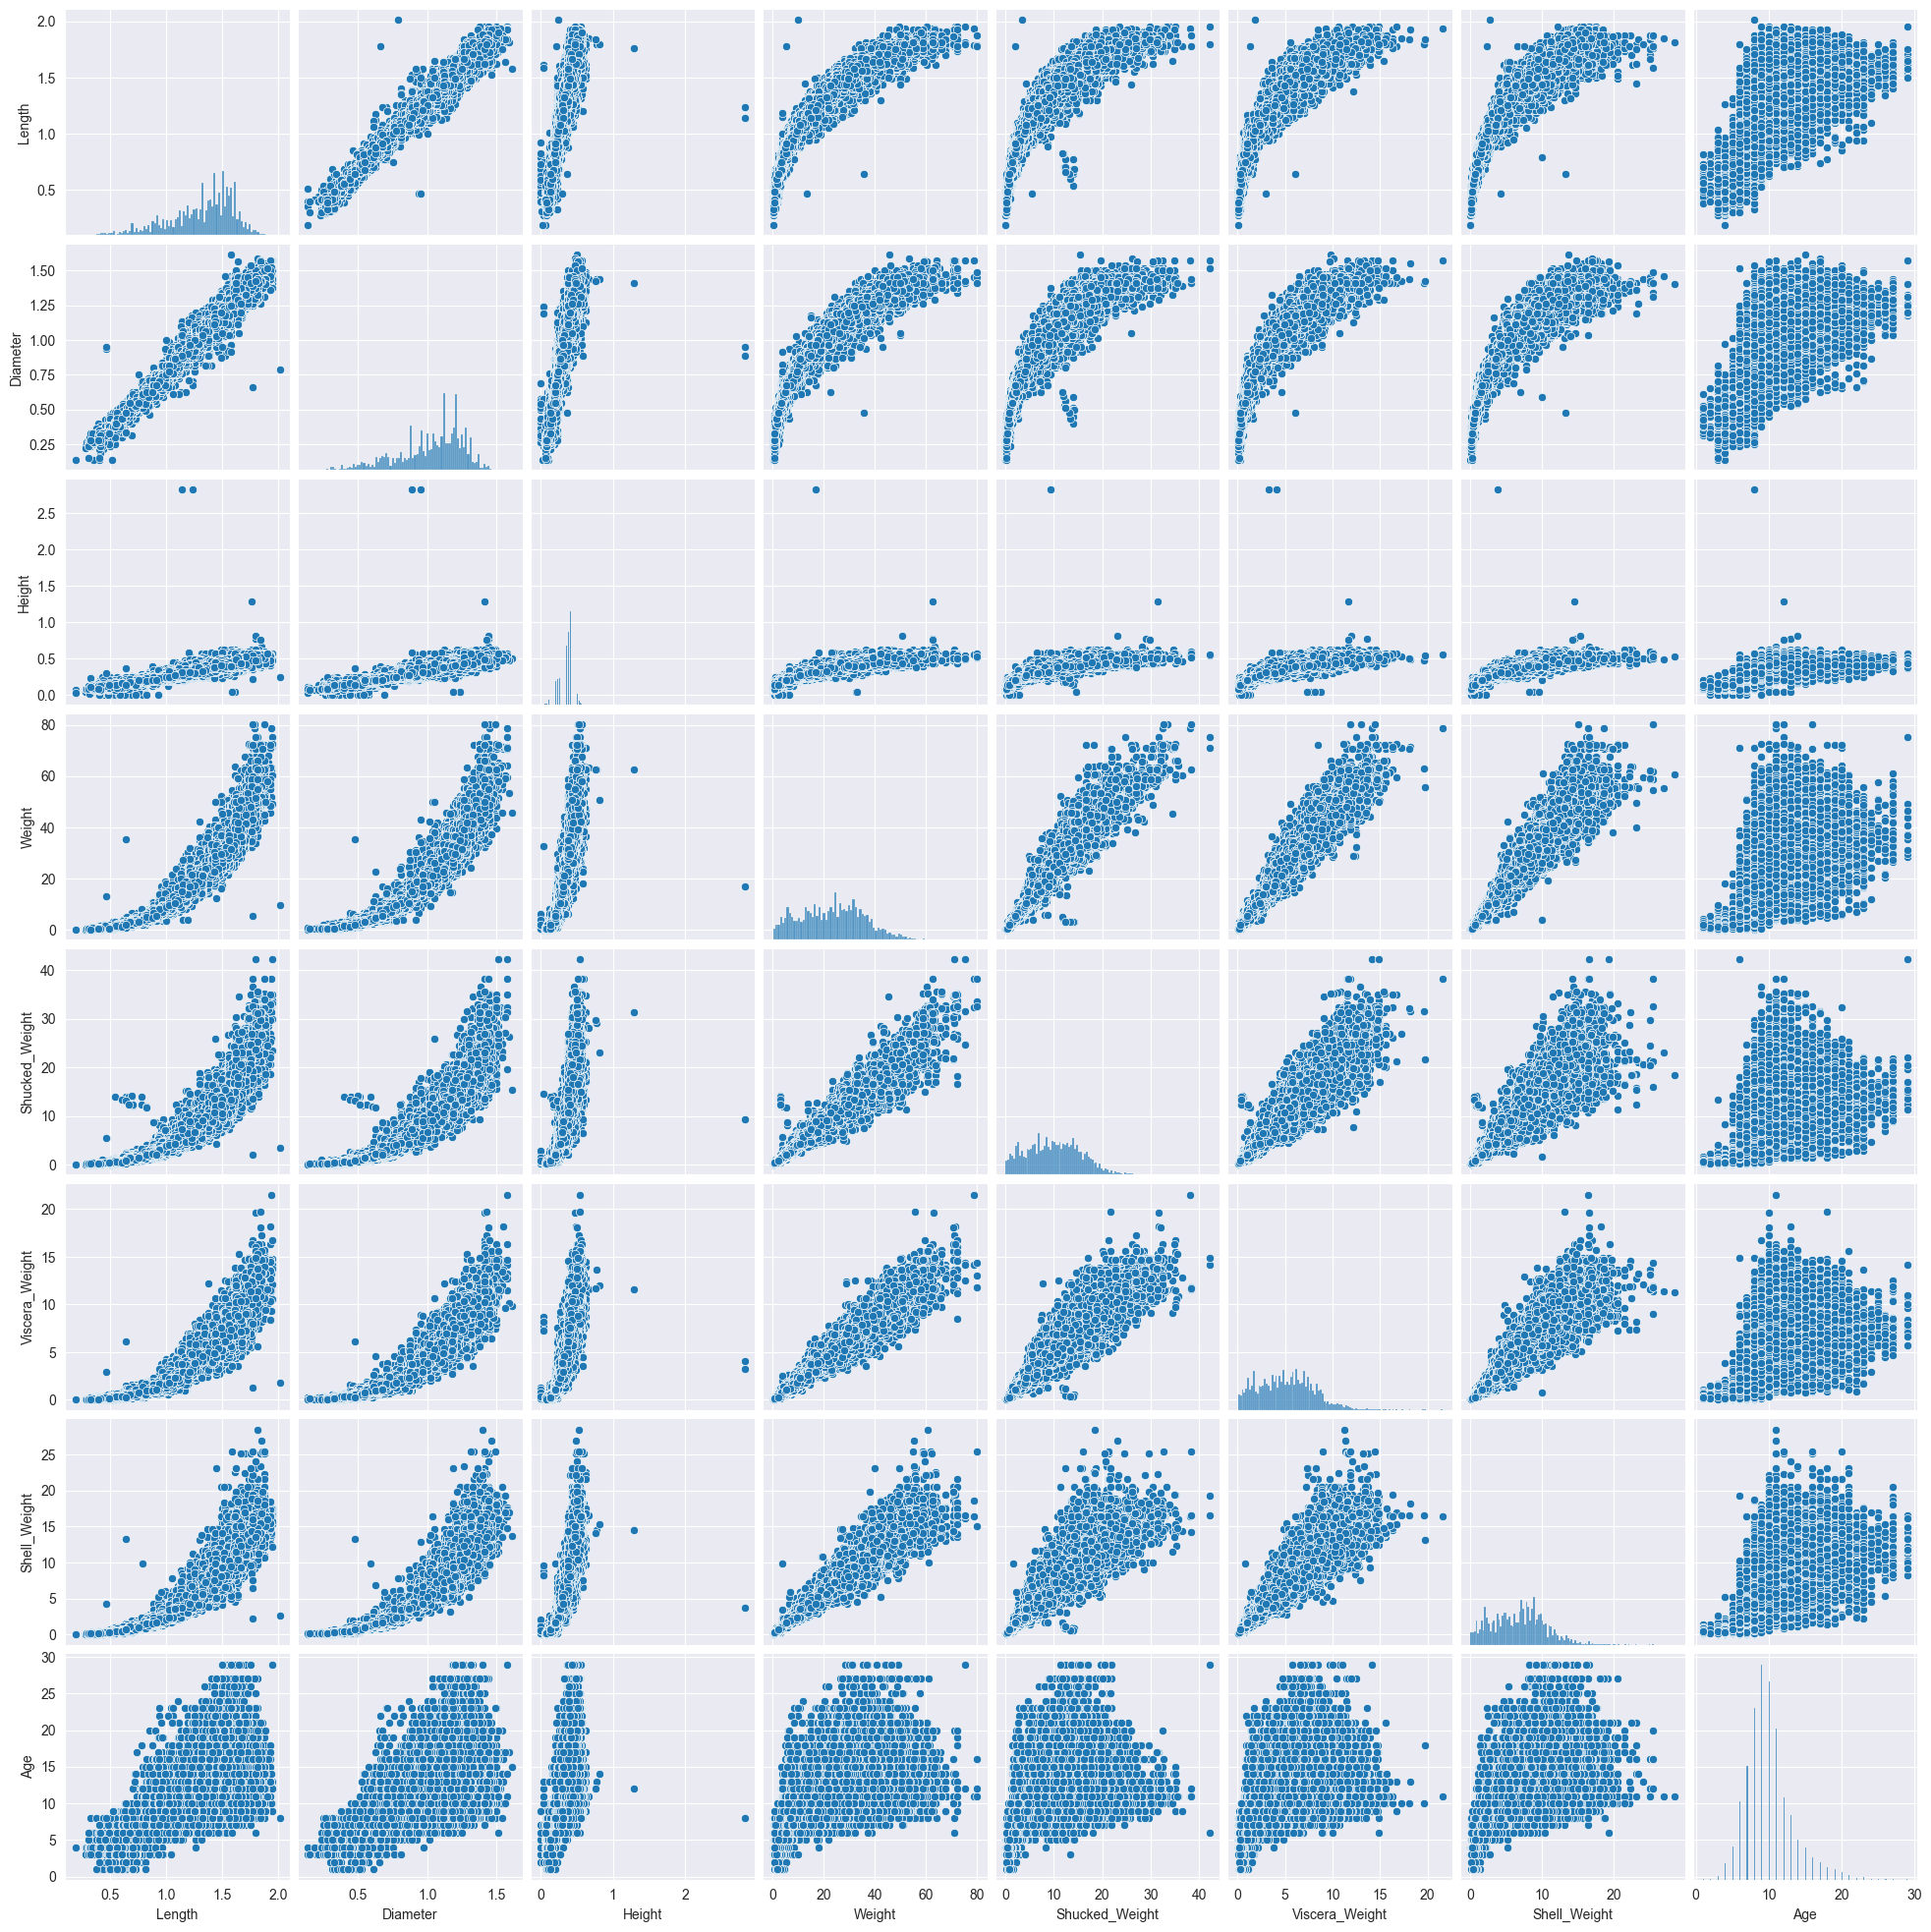

In [14]:
sns.pairplot(data=df)

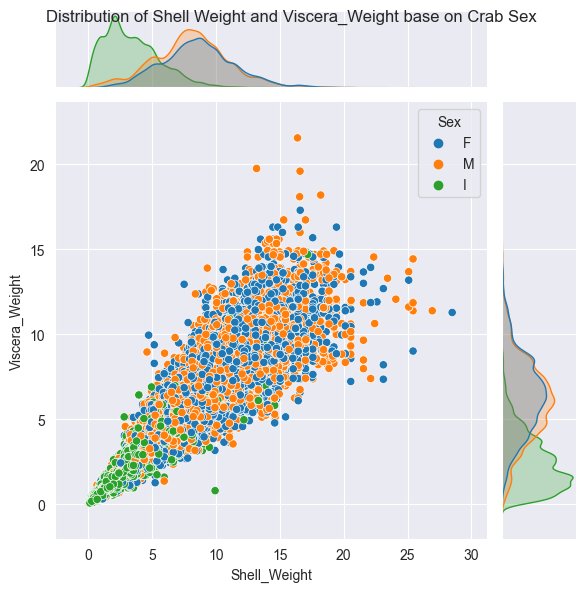

In [15]:
g = sns.jointplot(data=df,x="Shell_Weight",y="Viscera_Weight",kind='scatter',hue='Sex',hue_order=['F','M','I'])
plt.suptitle("Distribution of Shell Weight and Viscera_Weight base on Crab Sex")
sns.despine()
plt.show()

### Prepare the sample data for modelling 

In [16]:
samples = pd.get_dummies(df)
samples.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False


In [17]:
samples.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [18]:
feature_names = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Sex_F', 'Sex_I', 'Sex_M']

In [19]:
X = samples.drop(["Age"],axis=1).values
y = samples['Age'].values

Start the Pridiction with Linear Regression model 

In [20]:
#import DicisionTree regressior
from sklearn.linear_model import LinearRegression 

#import train test split
from sklearn.model_selection import train_test_split

#import mean square error
from sklearn.metrics import mean_squared_error as MSE 

#split the data into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


#Intantiate the dt
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse_dt = MSE(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print(f"Mean square value of lr model is : {mse_dt:3f}")
print(f"Root Means Square value of lr model is : {rmse_dt:.3f}")


Mean square value of lr model is : 4.515056
Root Means Square value of lr model is : 2.125


The mean square value is calculated by taking the average of the squared differences between the predicted values and the actual values. It is a measure of the overall variance or error in the model's predictions.

#### Mean square value of lr model is : 4.515056
#### Root Means Square value of lr model is : 2.125

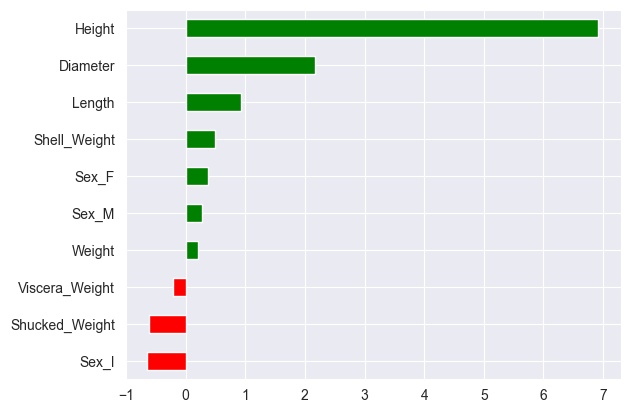

In [21]:
feature_importance = lr.coef_
#Create a pd sereies of feature importance 
importance_rf = pd.Series(feature_importance,index=feature_names)

#sort importance_rf
sorted_importance = importance_rf.sort_values()

# Determine the bar colors based on the sign of the importance values
bar_colors = ['red' if val < 0 else 'green' for val in sorted_importance]

#make a horizontal bar plot
sorted_importance.plot(kind='barh',color=bar_colors)
plt.show()

From the Above Plot we can see which feature are acting as posstive and negative impact on predicting the Age of Crab.

## Stochastic Gradient Boosting

In [22]:
#import models for utility function
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#set seed for reproducability
SEED = 2024

#split the train and test data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

#instantitate the Gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED)

#fit gb to the traininng set
gb.fit(X_train,y_train)

#predict the result and store it in y_pred
y_pred = gb.predict(X_test)

#evaludation
mse_score = MSE(y_test,y_pred)
rmse = mse_score**(1/2)

print(f"The Mean square error of gradieent boosting is {mse_score} and rmse is {rmse}")




The Mean square error of gradieent boosting is 4.522159092135267 and rmse is 2.126536877680532


Even with gradient boosting regressor we are getting similar rmse value

## Predict the crab age with the test data 

In [23]:
test_sample = pd.read_csv("test.csv",index_col=0)
test_sample.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [24]:
test_sample['Sex'] = test_sample['Sex'].astype('category')

In [25]:
test_sample = pd.get_dummies(test_sample)

In [26]:
y_sample =test_sample.values

In [27]:
## Predict the Results using our lr model

y_result = lr.predict(y_sample)

In [28]:
result = pd.DataFrame({'id':test_sample.index,'Age':y_result})
result.to_csv("Model_result.csv")

In [29]:
samples.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False


In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc.score(X_test,y_test)

0.3169787540511343

In [31]:
# The squared error, summed over training examples
from scipy.optimize import minimize
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[0.911156679220499 2.1373501267512673 7.221976482507302 0.1942627882110316
 -0.6141114198900421 -0.21637726689692663 0.5121499108453342
 3.7558091030252796 2.7150018078615656 3.640611747301483]
[ 0.91021072  2.13850734  7.22227204  0.19426493 -0.61411546 -0.21635112
  0.51212743  3.75575773  2.71502256  3.6405462 ]


Hyper paramter tuning for XGB boosting with grid cv

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

crab_matrx = xgb.DMatrix(data=X,label=y)

gbm_param_grid = {'learning_rate':[0.01,0.1,0.4,0.5,0.9],
                  'n_estimators':[100,200,300,400],
                  'subsample':[0.3,0.5,0.9],}

xgbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(estimator=xgbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)

grid_mse.fit(X,y)

print(f"best parameter found: ",grid_mse.best_params_)
print("lowest rmse found: ",(np.sqrt(np.abs(grid_mse.best_score_))))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
best parameter found:  {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.5}
lowest rmse found:  2.0480435100362318
